# Churn Analysis

In [1]:
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from scipy import interp

In [2]:
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns

# Custom Python Files
from dataprep.dataPrep import cleanData
from dataprep.modelPrep import model_prep
from dataprep.modelPrep import plotROCCurve

## Dataset 



In [3]:
#df = pd.read_csv('../input/mytest.csv')
df = cleanData("PSCCustomerData.csv")

print (df.shape)

df.dtypes

(242, 26)


pageviews                          float64
admins                             float64
employees                          float64
usecompetitors                       int64
contractdays                       float64
callcycle                           object
associateddeals                    float64
timescontacted                     float64
origsource                          object
firstdealDT                 datetime64[ns]
sessions                           float64
FF                                   int64
gauge                               object
assoccontacts                      float64
renewalDT                           object
associatedpredictionlead             int64
industry                            object
publiclytraded                     float64
strategic                            int64
MRR                                float64
callcycle_numeric                    int64
competingProducts                    int64
churn                                int64
daysAsCusto

In [4]:
# Load data
df.head(3)

,churn,pageviews,admins,employees,usecompetitors,contractdays,callcycle,associateddeals,timescontacted,origsource,sessions,FF,gauge,industry,strategic,competingProducts
0,0,1,0,1000,0,0,Monthly,2,3,Direct Traffic,0,1,Green,Construction,1,NaN
1,0,5,0,10000,0,0,Quarterly,0,13,Direct Traffic,2,0,Green,Consumer Goods,1,NaN
2,1,0,0,0,0,0,Quarterly,0,8,Unknown,0,0,Red,Oil & Energy,1,NaN


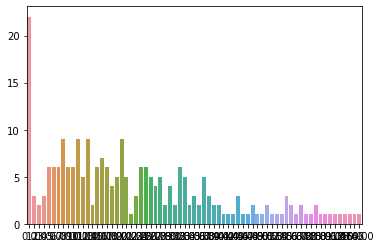

In [4]:
y = df["timescontacted"].value_counts()
#print (y)
sns.barplot(y.index, y.values)

In [5]:
y_True = df["churn"][df["churn"] == True]
print ("Churn Percentage = "+str( (y_True.shape[0] / df["churn"].shape[0]) * 100 ))

Churn Percentage = 19.834710743801654


### Conclusion 1 = Imbalanced data - Lesser datapoints in True Churn category

# Descriptive Analysis

In [7]:
df.describe()

,churn,pageviews,admins,employees,usecompetitors,contractdays,associateddeals,timescontacted,sessions,FF,strategic
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,0.198347,71.194215,7.690083,2127.024793,0.206612,1.760331,2.107438,26.433884,34.082645,0.471074,0.194215
std,0.399581,199.306306,47.757242,3517.436949,0.405713,5.423209,2.298481,47.863197,98.411625,0.500197,0.396415
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,500.000000,0.000000,0.000000,2.000000,18.000000,1.000000,0.000000,0.000000
75%,0.000000,36.000000,1.000000,1000.000000,0.000000,2.000000,3.000000,32.000000,13.000000,1.000000,0.000000
max,1.000000,1807.000000,600.000000,10000.000000,1.000000,68.000000,21.000000,666.000000,879.000000,1.000000,1.000000


### Churn By Gauge

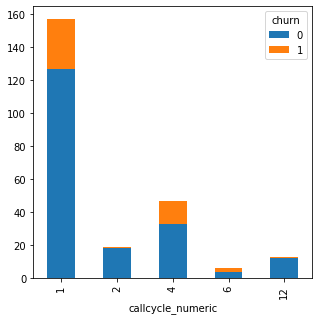

In [6]:
df.groupby(["callcycle_numeric", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

### Churn By Call Cycle

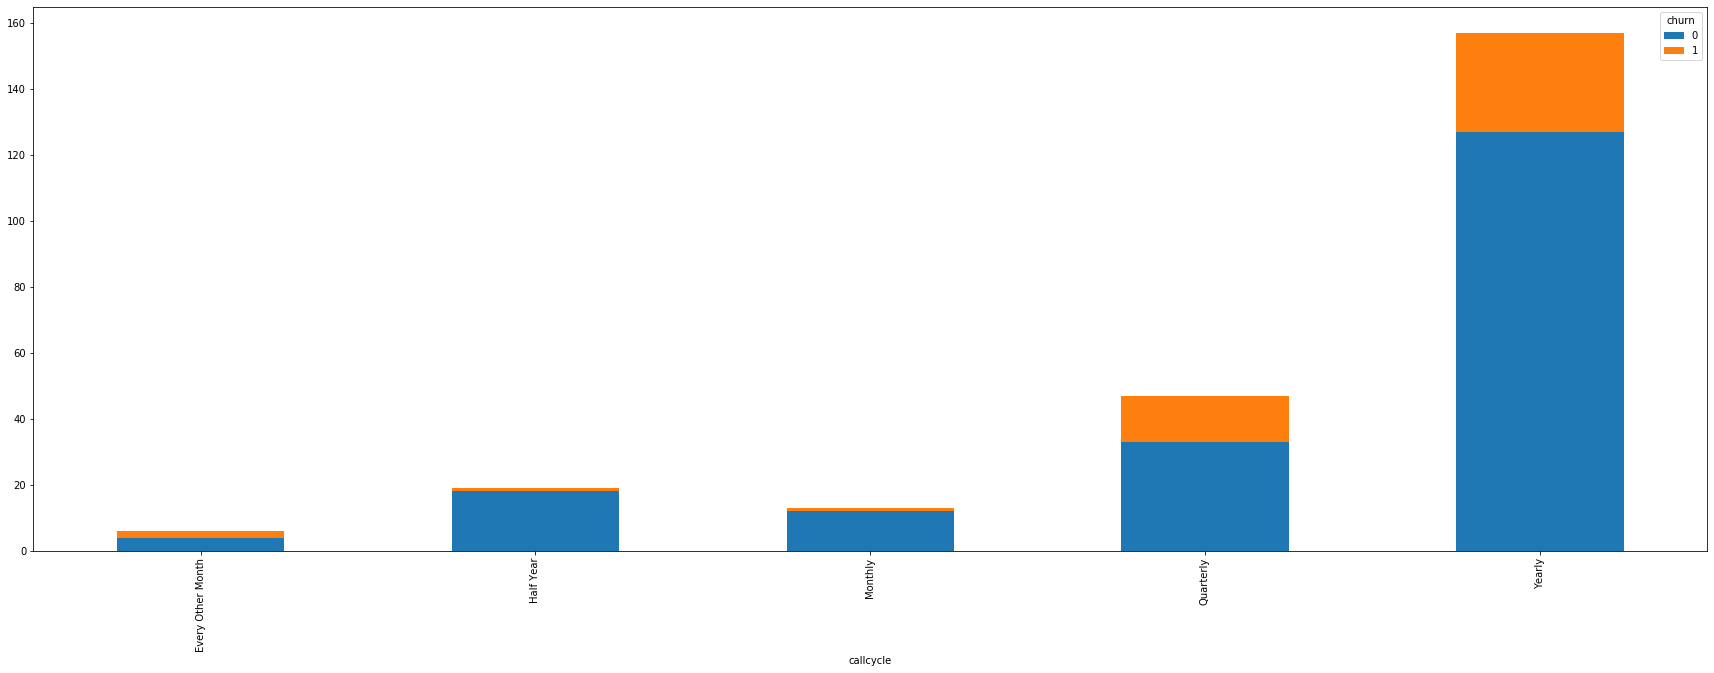

In [7]:
df.groupby(["callcycle", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

### Churn By Industry

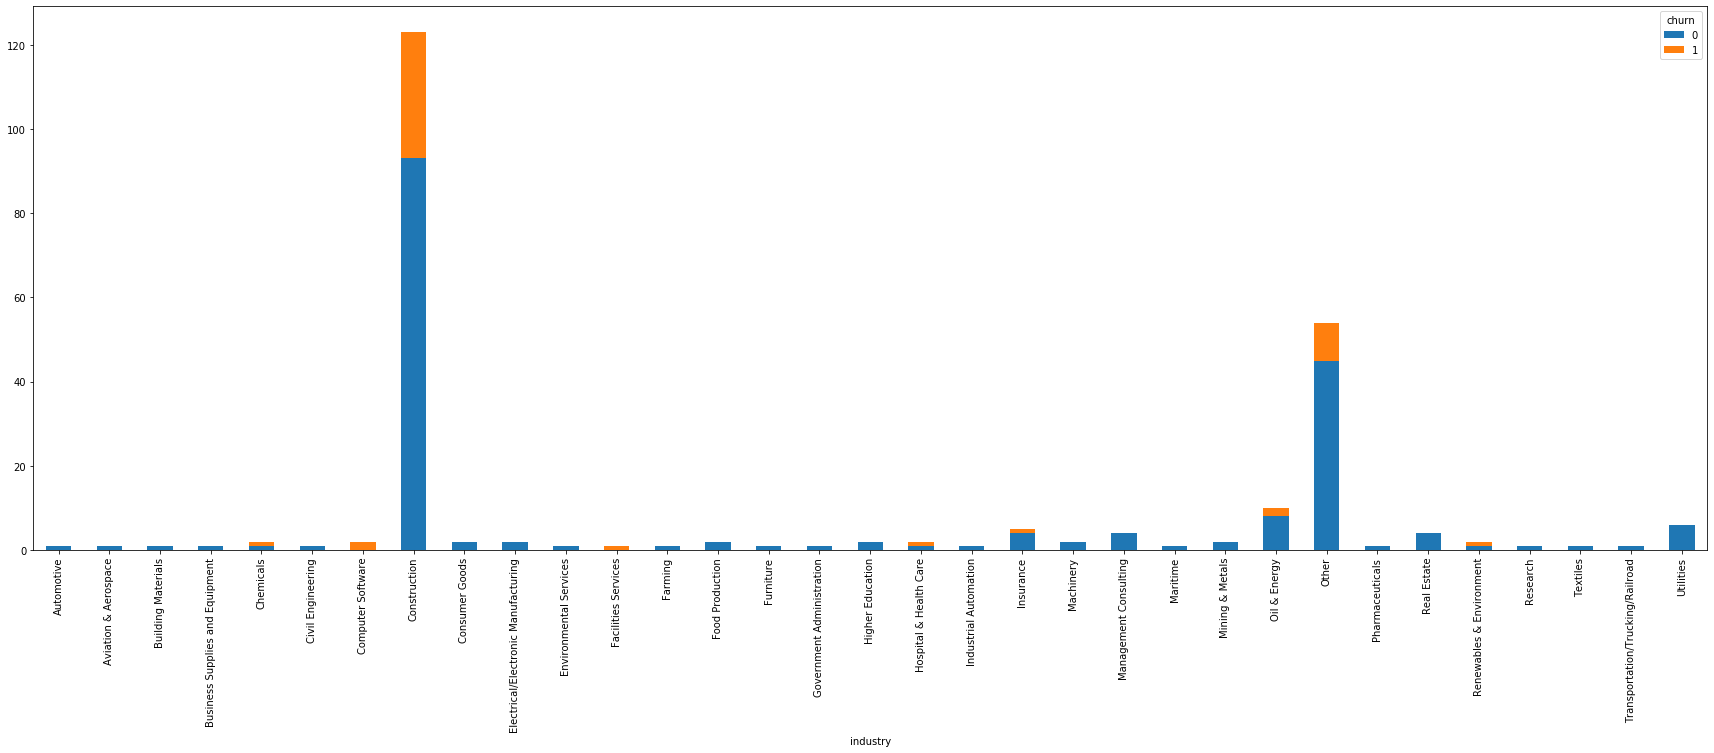

In [10]:
df.groupby(["industry", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

### Churn By Strategic

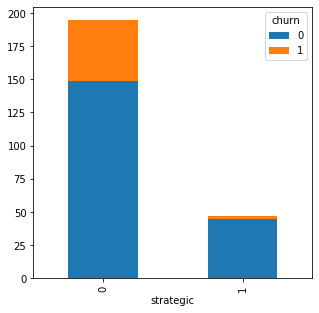

In [10]:
df.groupby(["strategic", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

### Churn By Competitors

In [4]:
# Breakout Competitors
competitors = pd.read_csv('data.csv').query("competingProducts == competingProducts")
competitors.loc[:,('competingProducts')] = competitors.loc[:,('competingProducts')].str.split(pat=";")

namesComps = competitors.explode("competingProducts")

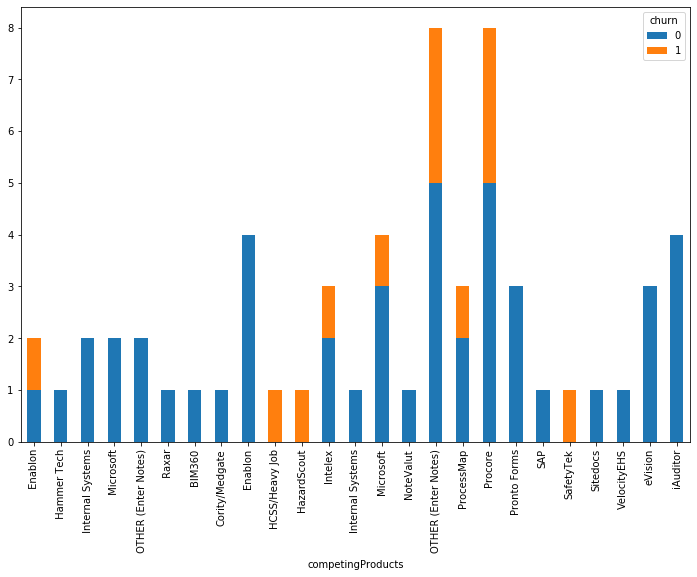

In [6]:
namesComps.groupby(["competingProducts", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(12,8)) 